In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_df = pd.read_csv('./input/train.csv', index_col=0)

room_columns = ['SalePrice','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                   'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional']
other_columns = ['SalePrice','Fireplaces','FireplaceQu','GarageType','GarageYrBlt',
                  'GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond',
                  'PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence']

In [3]:
# GarageType
# GarageCond 
# GarageFinish
# GarageQual 
# KitchenQual
# Functional
others_df.groupby('GarageType').size()

# df.loc[df['GarageCond'].isnull(),'GarageCond'] ='TA'
# df.loc[df['GarageFinish'].isnull(),'GarageFinish'] ='Unf'
# df.loc[df['GarageQual'].isnull(),'GarageQual'] ='TA'
# df.loc[df['KitchenQual'].isnull(),'KitchenQual'] ='TA'
# df.loc[df['Functional'].isnull(),'Functional'] ='Typ'


# GarageType
# 2Types       6
# Attchd     870
# Basment     19
# BuiltIn     88
# CarPort      9
# Detchd     387

# GarageCond
# Ex       2
# Fa      35
# Gd       9
# Po       7
# TA    1326

# GarageFinish
# Fin    352
# RFn    422
# Unf    605

# GarageQual
# Ex       3
# Fa      48
# Gd      14
# Po       3
# TA    1311

# KitchenQual
# Ex    100
# Fa     39
# Gd    586
# TA    735

# Functional
# Maj1      14
# Maj2       5
# Min1      31
# Min2      34
# Mod       15
# Sev        1
# Typ     1360

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
dtype: int64

### 6.户型：卫生间、厨房、卧室、壁炉（附加设施）
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath（可以洗澡的全功能卫生间）: Full bathrooms above grade
- HalfBath（只能wc的卫生间）: Half baths above grade
- Bedroom（地上卧室个数）: Number of bedrooms above basement level
- Kitchen（厨房数）: Number of kitchens
- KitchenQual（厨房质量）: Kitchen quality
- TotRmsAbvGrd（总房间数，不包括卫生间）: Total rooms above grade (does not include bathrooms)
- Functional（家庭功能评级）: Home functionality rating

In [2]:
room_df = train_df.loc[:, room_columns]
room_df.head()

,SalePrice,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional
Id,,,,,,,,,,
1,208500,1,0,2,1,3,1,Gd,8,Typ
2,181500,0,1,2,0,3,1,TA,6,Typ
3,223500,1,0,2,1,3,1,Gd,6,Typ
4,140000,1,0,1,0,3,1,Gd,7,Typ
5,250000,1,0,2,1,4,1,Gd,9,Typ


In [3]:
room_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 10 columns):
SalePrice       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
KitchenQual     1460 non-null object
TotRmsAbvGrd    1460 non-null int64
Functional      1460 non-null object
dtypes: int64(8), object(2)
memory usage: 125.5+ KB


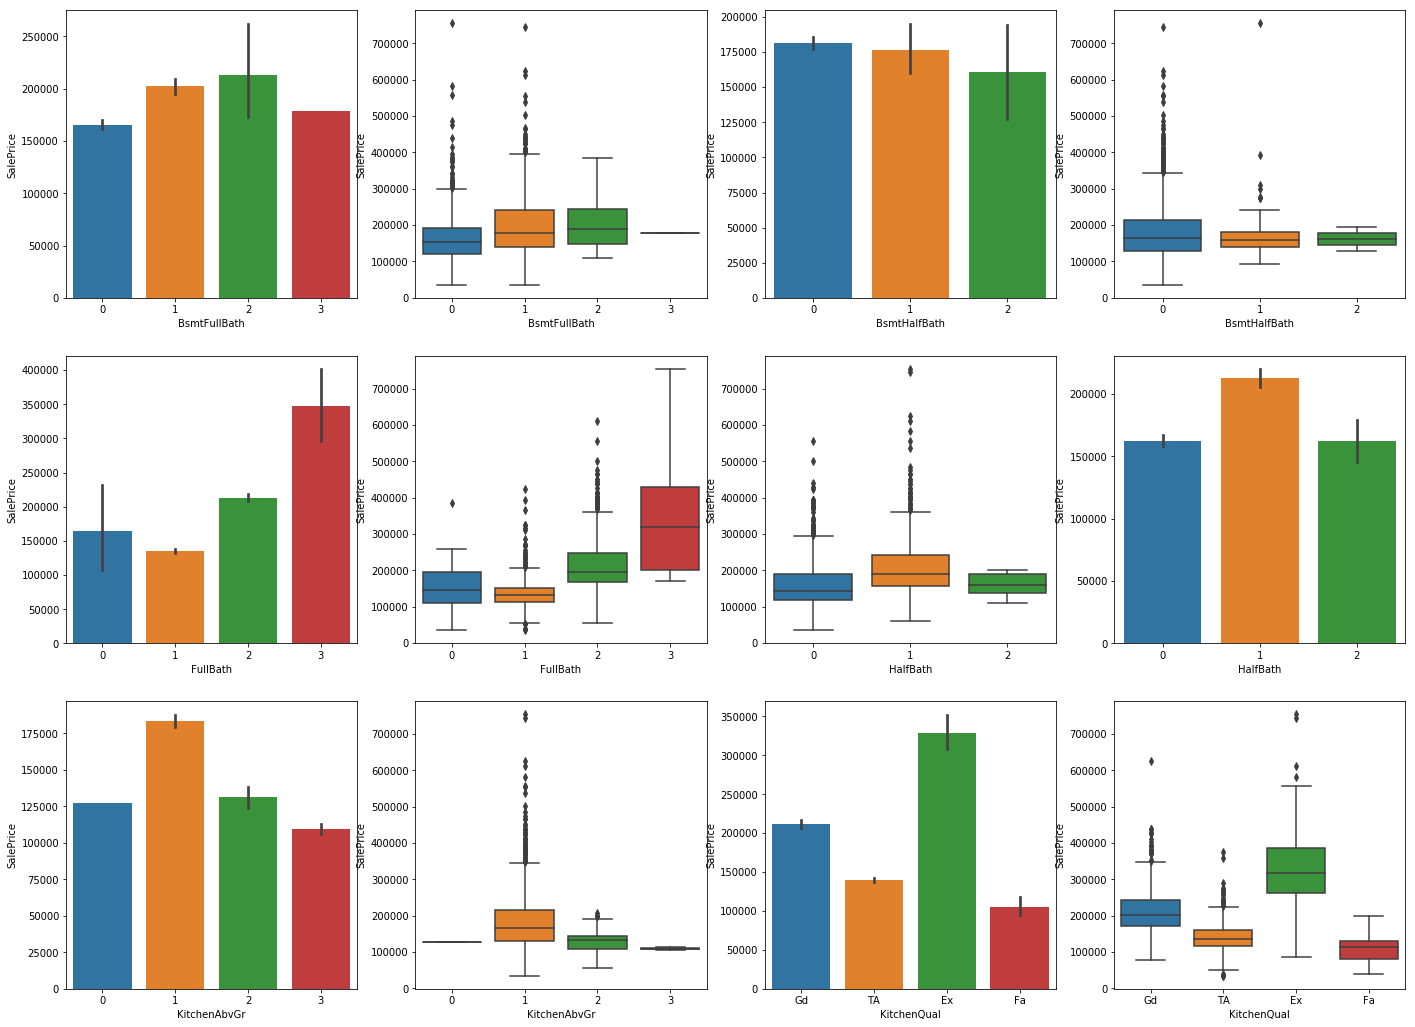

In [4]:
sns.set_context({"figure.figsize": (24, 18)})

### bsmt地下卫生间？
plt.subplot2grid((3,4),(0,0))
# room_df.groupby('BsmtFullBath').agg(np.median)['SalePrice'].plot(grid=True)
sns.barplot(x='BsmtFullBath', y='SalePrice', data=room_df)
plt.subplot2grid((3,4),(0,1))
sns.boxplot(x='BsmtFullBath', y='SalePrice', data=room_df)

plt.subplot2grid((3,4),(0,2))
sns.barplot(x='BsmtHalfBath', y='SalePrice', data=room_df)
plt.subplot2grid((3,4),(0,3))
sns.boxplot(x='BsmtHalfBath', y='SalePrice', data=room_df)

#bathroom
plt.subplot2grid((3,4),(1,0))
sns.barplot(x='FullBath', y='SalePrice', data=room_df)
plt.subplot2grid((3,4),(1,1))
sns.boxplot(x='FullBath', y='SalePrice', data=room_df)

plt.subplot2grid((3,4),(1,2))
sns.boxplot(x='HalfBath', y='SalePrice', data=room_df)
plt.subplot2grid((3,4),(1,3))
sns.barplot(x='HalfBath', y='SalePrice', data=room_df)

#kitchen
plt.subplot2grid((3,4),(2,0))
sns.barplot(x='KitchenAbvGr', y='SalePrice', data=room_df)
plt.subplot2grid((3,4),(2,1))
sns.boxplot(x='KitchenAbvGr', y='SalePrice', data=room_df)

plt.subplot2grid((3,4),(2,2))
sns.barplot(x='KitchenQual', y='SalePrice', data=room_df)
plt.subplot2grid((3,4),(2,3))
sns.boxplot(x='KitchenQual', y='SalePrice', data=room_df)


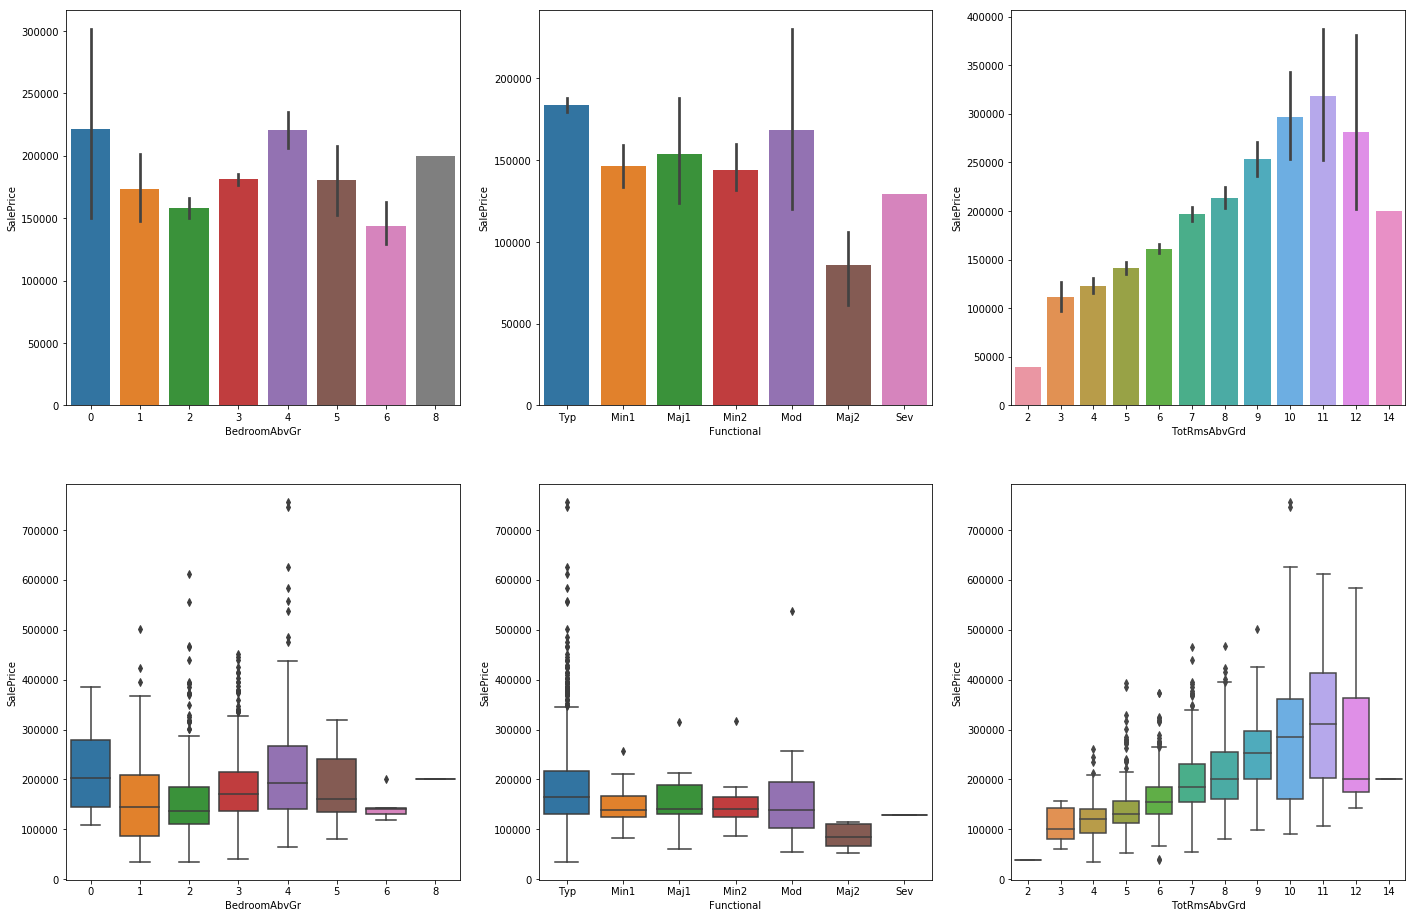

In [5]:
sns.set_context({"figure.figsize": (24, 16)})

plt.subplot2grid((2,3),(0,0))
sns.barplot(x='BedroomAbvGr', y='SalePrice', data=room_df)
plt.subplot2grid((2,3),(1,0))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=room_df)

plt.subplot2grid((2,3),(0,1))
sns.barplot(x='Functional', y='SalePrice', data=room_df)
plt.subplot2grid((2,3),(1,1))
sns.boxplot(x='Functional', y='SalePrice', data=room_df)


plt.subplot2grid((2,3),(0,2))
sns.barplot(x='TotRmsAbvGrd', y='SalePrice', data=room_df)
plt.subplot2grid((2,3),(1,2))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=room_df)

### 7.配套情况：壁炉、车库、露台、走廊、游泳池、围栏
- Fireplaces（壁炉数量）: Number of fireplaces
- FireplaceQu（壁炉材质）: Fireplace quality

- GarageType（车库位置）: Garage location
- GarageYrBlt（车库建筑年代）: Year garage was built
- GarageFinish（车库装修：车库内部装修）: Interior finish of the garage
- GarageCars（车库容量，几台车？）: Size of garage in car capacity
- GarageArea（车库面积）: Size of garage in square feet
- GarageQual（车库质量）: Garage quality
- GarageCond（车库状况）: Garage condition
- PavedDrive（已铺道路）: Paved driveway

- WoodDeckSF（木质露台面积）: Wood deck area in square feet
- OpenPorchSF（开放走廊面积）: Open porch area in square feet
- EnclosedPorch（封闭走廊过道面积）: Enclosed porch area in square feet
- 3SsnPorch（能用三个季节的门廊）: Three season porch area in square feet
- ScreenPorch（季节门廊）: Screen porch area in square feet

- PoolArea（游泳池面积）: Pool area in square feet
- PoolQC（游泳池材质）: Pool quality
- Fence（围栏/篱笆 材质）: Fence quality

In [2]:
others_df = train_df.loc[:, other_columns]
others_df.head()

,SalePrice,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,
1,208500,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN
2,181500,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN
3,223500,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN
4,140000,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN
5,250000,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN


In [7]:
others_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
SalePrice        1460 non-null int64
Fireplaces       1460 non-null int64
FireplaceQu      770 non-null object
GarageType       1379 non-null object
GarageYrBlt      1379 non-null float64
GarageFinish     1379 non-null object
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
GarageQual       1379 non-null object
GarageCond       1379 non-null object
PavedDrive       1460 non-null object
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
PoolQC           7 non-null object
Fence            281 non-null object
dtypes: float64(1), int64(10), object(8)
memory usage: 268.1+ KB


### 7-1.车库特征分析
- 类别型变量做one-hot吧，Ta和Gd在房屋里见过，有的贵些
- GarageType GarageFinish GarageQual GarageCond 
- GarageCars虽然数值型，是离散的，也做one-hot处理

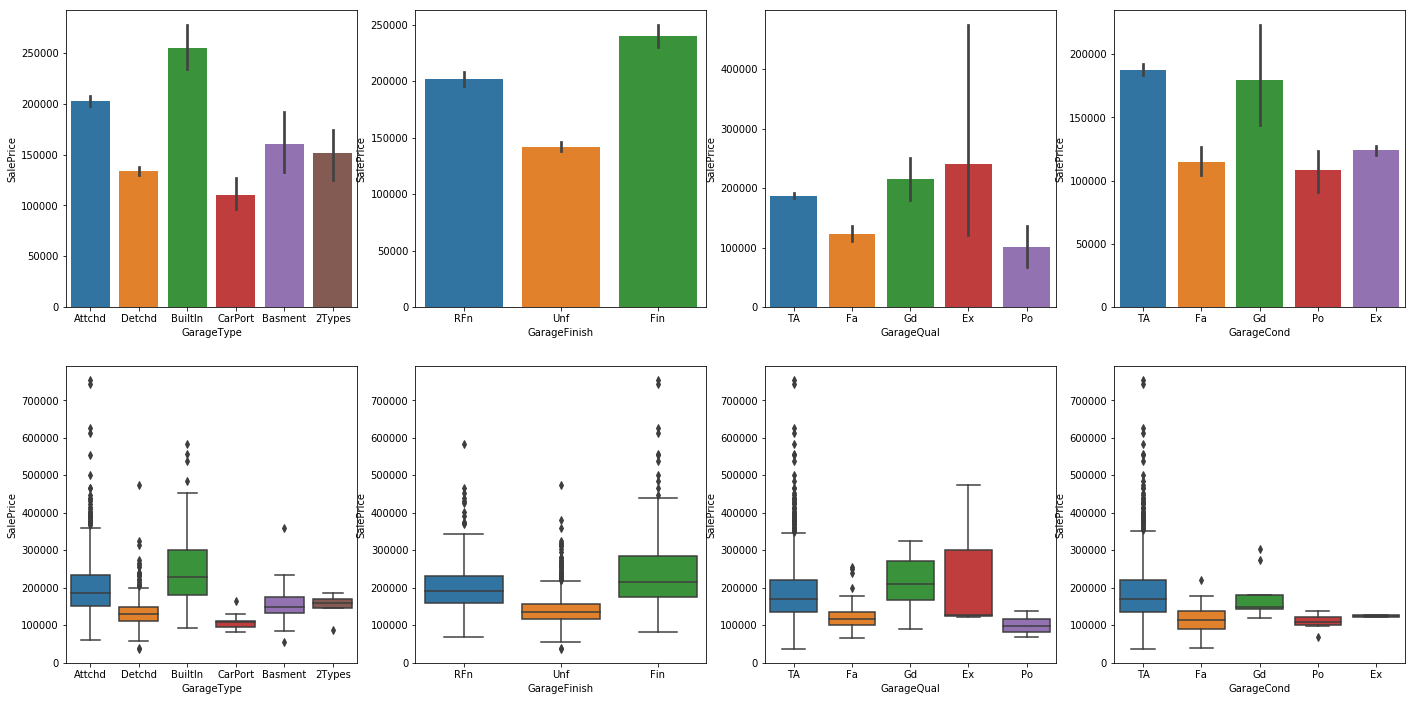

In [8]:
#int  'GarageYrBlt',,'GarageCars','GarageArea'
#obj  GarageType GarageFinish GarageQual GarageCond

sns.set_context({"figure.figsize": (24, 12)})

plt.subplot2grid((2,4),(0,0))
sns.barplot(x='GarageType', y='SalePrice', data=others_df)
plt.subplot2grid((2,4),(1,0))
sns.boxplot(x='GarageType', y='SalePrice', data=others_df)

plt.subplot2grid((2,4),(0,1))
sns.barplot(x='GarageFinish', y='SalePrice', data=others_df)
plt.subplot2grid((2,4),(1,1))
sns.boxplot(x='GarageFinish', y='SalePrice', data=others_df)

plt.subplot2grid((2,4),(0,2))
sns.barplot(x='GarageQual', y='SalePrice', data=others_df)
plt.subplot2grid((2,4),(1,2))
sns.boxplot(x='GarageQual', y='SalePrice', data=others_df)

plt.subplot2grid((2,4),(0,3))
sns.barplot(x='GarageCond', y='SalePrice', data=others_df)
plt.subplot2grid((2,4),(1,3))
sns.boxplot(x='GarageCond', y='SalePrice', data=others_df)

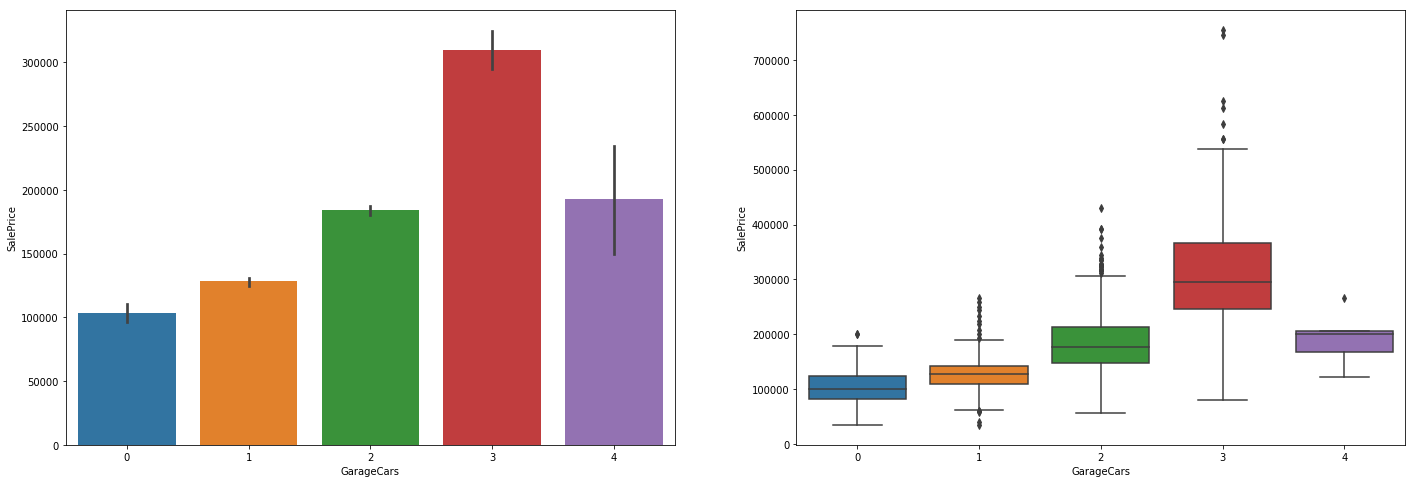

In [9]:
sns.set_context({"figure.figsize": (24, 8)})

plt.subplot2grid((1,2),(0,0))
sns.barplot(x='GarageCars', y='SalePrice', data=others_df)
plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='GarageCars', y='SalePrice', data=others_df)

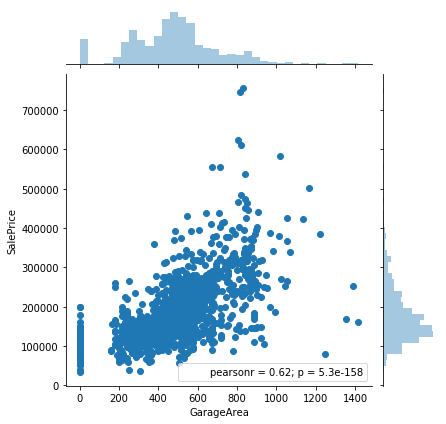

In [12]:
sns.jointplot(x='GarageArea', y='SalePrice', data=others_df)

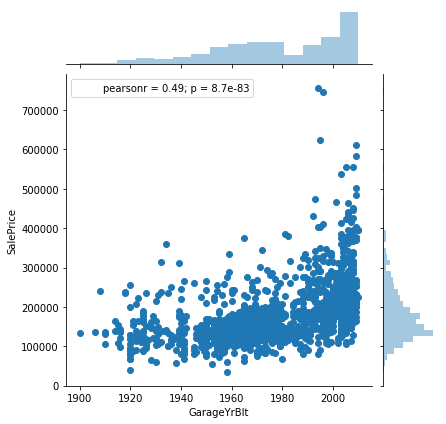

In [13]:
sns.jointplot(x='GarageYrBlt', y='SalePrice', data=others_df)

### 7-2.车库特征分析2，连续数值型分桶
- GarageArea（车库面积） 0, 0,200 200,800 800,1200, >1200
- GarageYrBlt(车库年代) < 1940 1940,2000 >2000


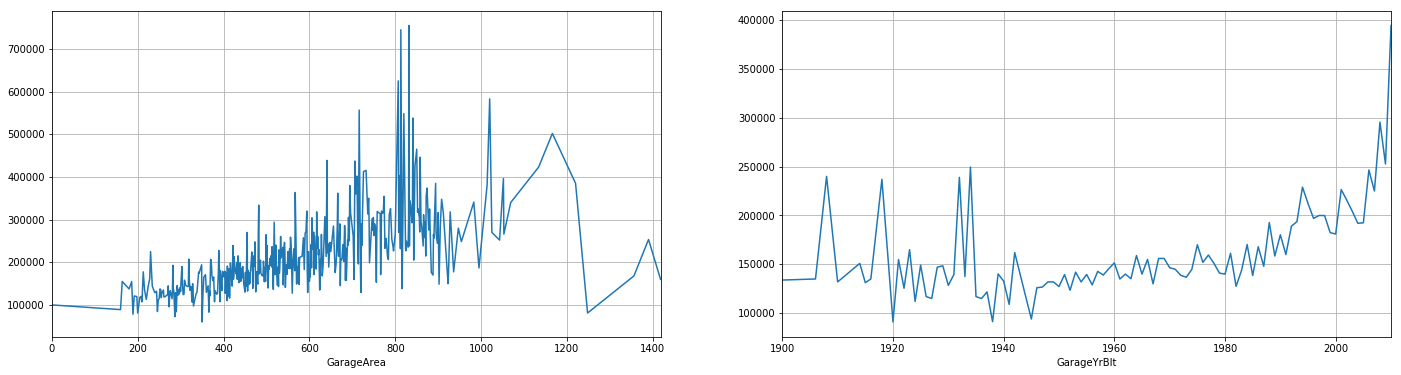

In [14]:
sns.set_context({"figure.figsize": (24, 6)})

plt.subplot2grid((1,2),(0,0))
others_df.groupby('GarageArea').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((1,2),(0,1))
others_df.groupby('GarageYrBlt').agg(np.median)['SalePrice'].plot(grid=True)

In [16]:
others_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
SalePrice        1460 non-null int64
Fireplaces       1460 non-null int64
FireplaceQu      770 non-null object
GarageType       1379 non-null object
GarageYrBlt      1379 non-null float64
GarageFinish     1379 non-null object
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
GarageQual       1379 non-null object
GarageCond       1379 non-null object
PavedDrive       1460 non-null object
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
PoolQC           7 non-null object
Fence            281 non-null object
dtypes: float64(1), int64(10), object(8)
memory usage: 268.1+ KB


### 7-3.配套特征分析： 壁炉、游泳池、围栏
- 已铺道路：相对来说，铺好路还是价格高
- 壁炉：有就贵，按材质价值差异很大
- 泳池：固定价格，555面积最贵，其他大小价格差不多
- 围栏：Fence没看出来有什么规律，大同小异


- onehot：Fireplaces','FireplaceQu' PoolArea PavedDrive
- fence：围栏，有或者没有，分为两类
- 'PoolQC': 和其他差不多，ex贵一些 null太多，考虑直接去掉

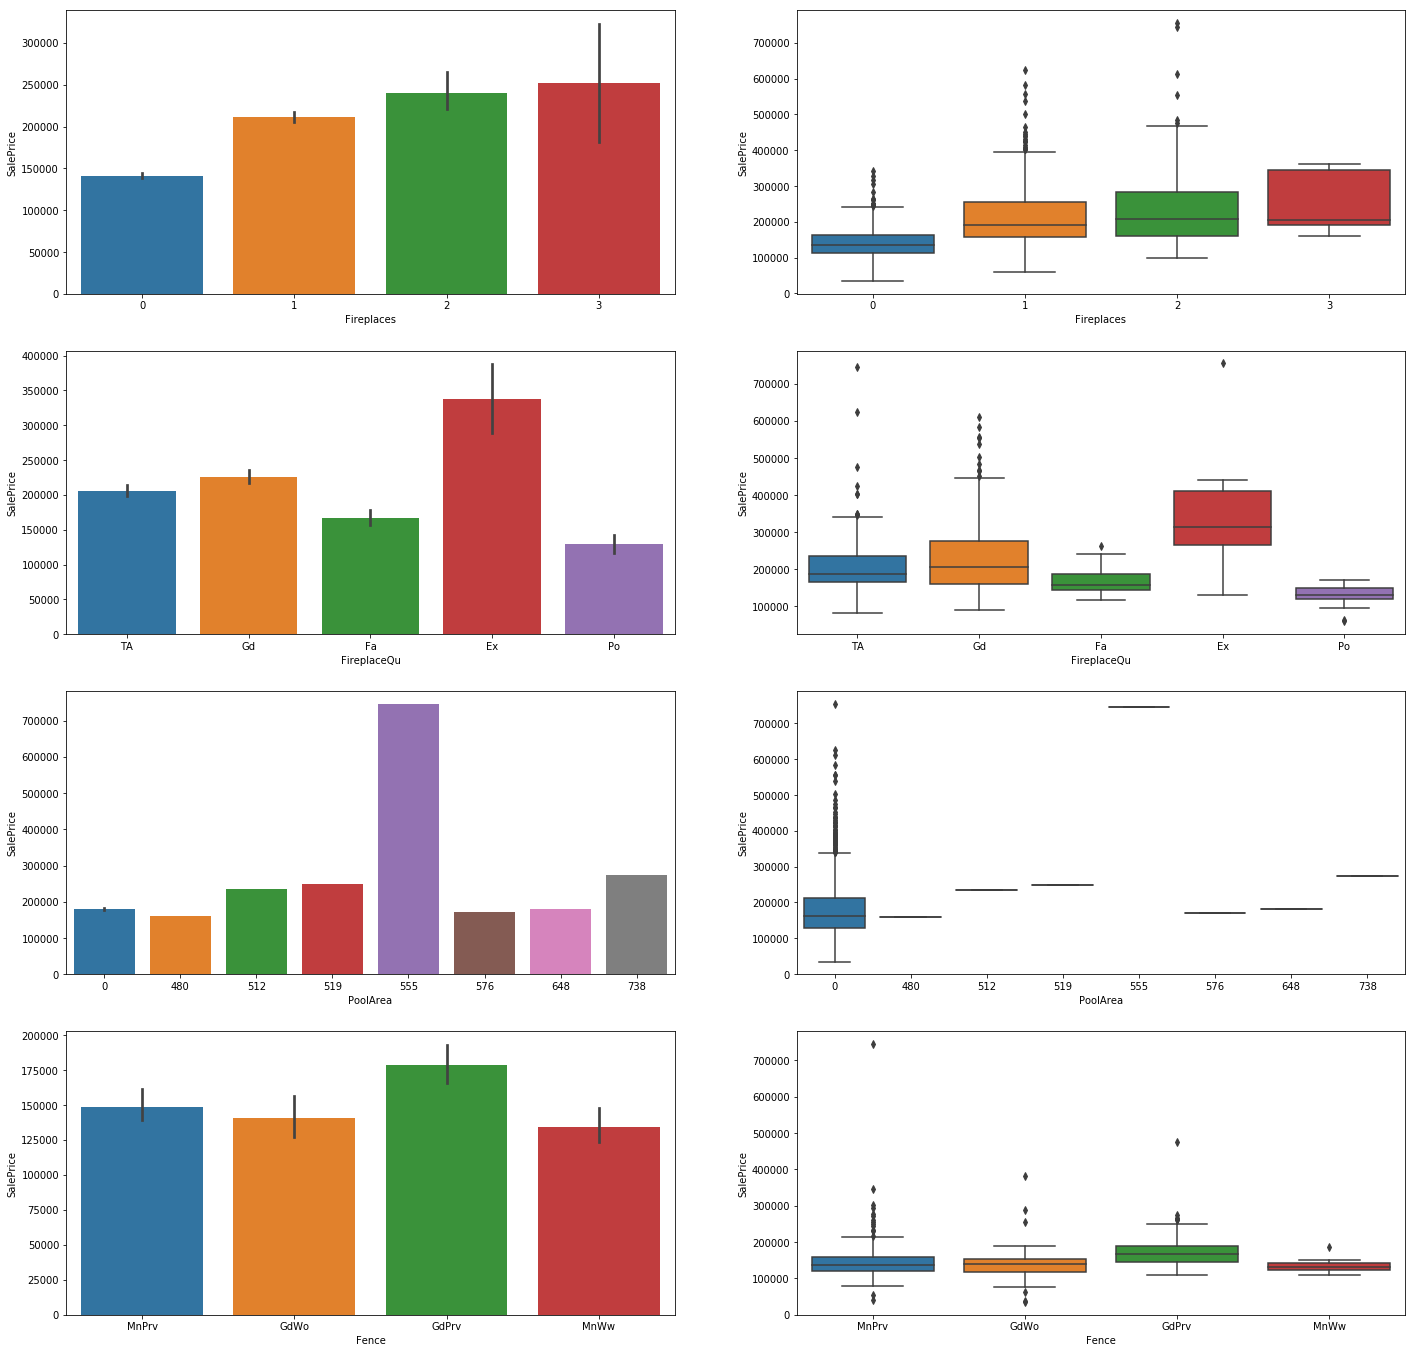

In [27]:
# 'Fireplaces','FireplaceQu'

sns.set_context({"figure.figsize": (24, 24)})

plt.subplot2grid((4,2),(0,0))
sns.barplot(x='Fireplaces', y='SalePrice', data=others_df)
plt.subplot2grid((4,2),(0,1))
sns.boxplot(x='Fireplaces', y='SalePrice', data=others_df)

plt.subplot2grid((4,2),(1,0))
sns.barplot(x='FireplaceQu', y='SalePrice', data=others_df)
plt.subplot2grid((4,2),(1,1))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=others_df)


plt.subplot2grid((4,2),(2,0))
sns.barplot(x='PoolArea', y='SalePrice', data=others_df)
plt.subplot2grid((4,2),(2,1))
sns.boxplot(x='PoolArea', y='SalePrice', data=others_df)

plt.subplot2grid((4,2),(3,0))
sns.barplot(x='Fence', y='SalePrice', data=others_df)
plt.subplot2grid((4,2),(3,1))
sns.boxplot(x='Fence', y='SalePrice', data=others_df)

- 泳池质量 没什么参考价值

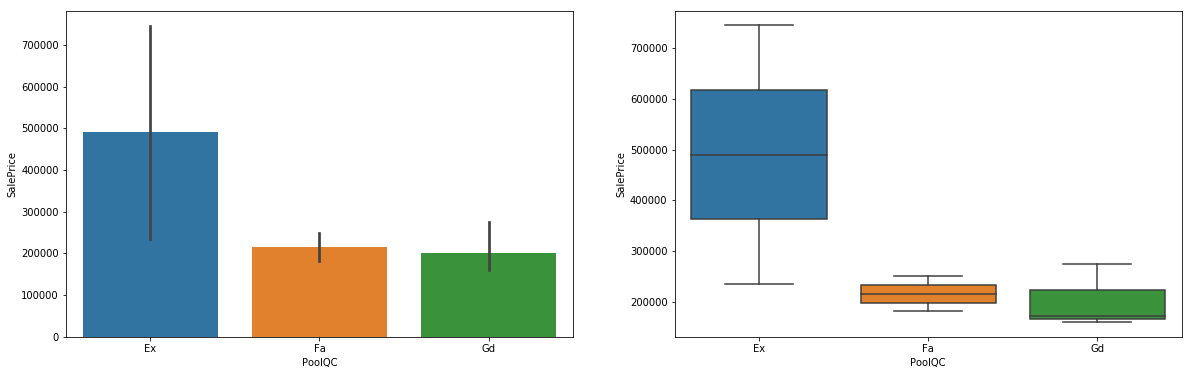

In [39]:
sns.set_context({"figure.figsize": (20, 6)})

plt.subplot2grid((1,2),(0,0))
sns.barplot(x='PoolQC', y='SalePrice', data=others_df)
plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='PoolQC', y='SalePrice', data=others_df)




- 已铺道路 PavedDrive

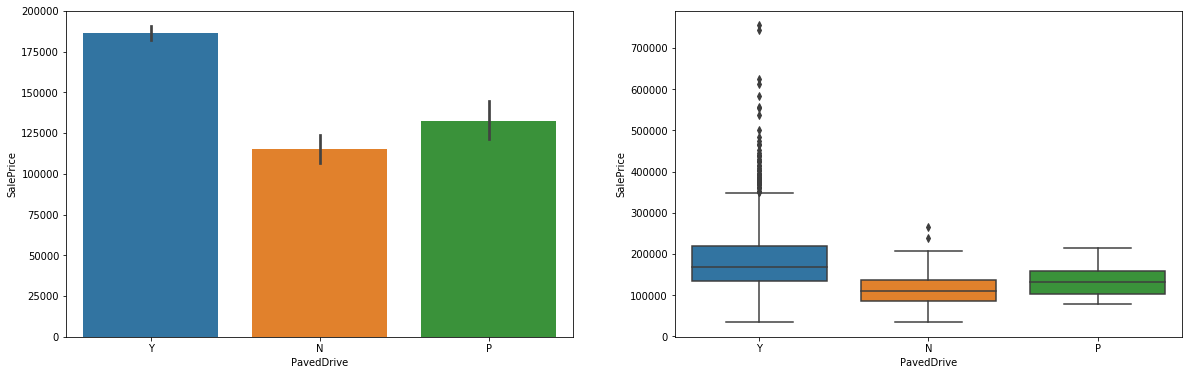

In [40]:
sns.set_context({"figure.figsize": (20, 6)})

plt.subplot2grid((1,2),(0,0))
sns.barplot(x='PavedDrive', y='SalePrice', data=others_df)
plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='PavedDrive', y='SalePrice', data=others_df)


In [ ]:
'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'

### 7-4.配套特征分析 ：露台门廊
- 根据数据规律，分桶处理
    - WoodDeckSF   ==0, (0,400) >400
    - OpenPorchSF ==0, (0,300) >300
    - EnclosedPorch ==0, (0,300) >300
    - OpenPorchSF ==0 , (0,300) >300
    - ScreenPorch ==0,(0,130) (130,300) >300

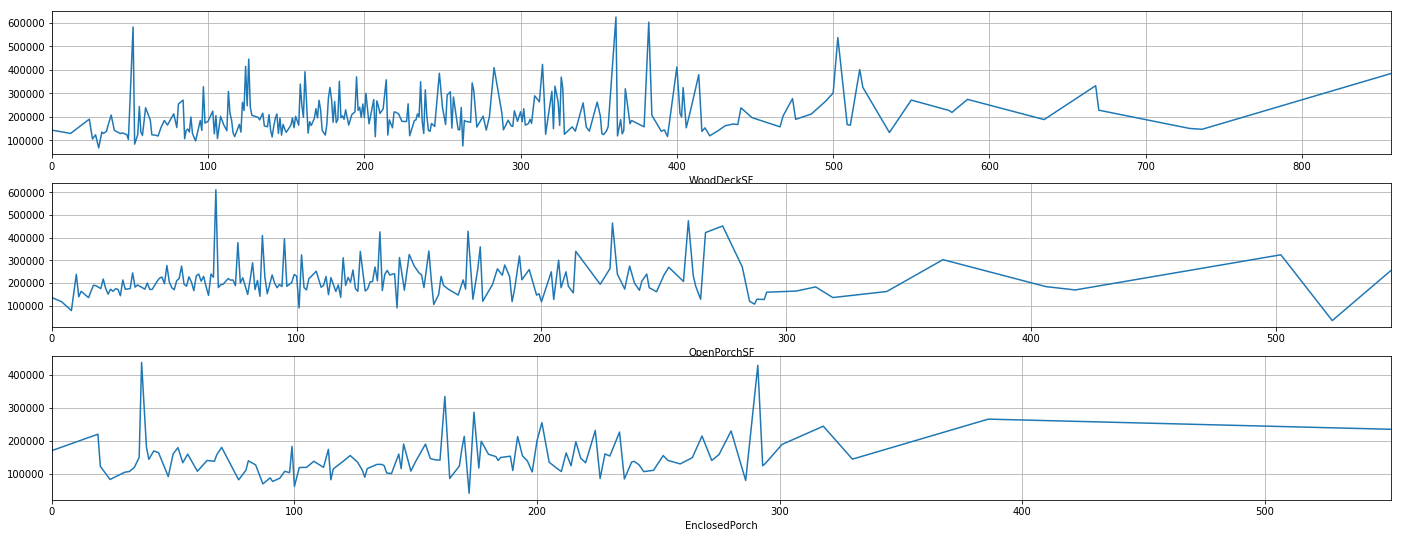

In [53]:
sns.set_context({"figure.figsize": (24, 9)})

plt.subplot2grid((3,1),(0,0))
others_df.groupby('WoodDeckSF').agg(np.median)['SalePrice'].plot(grid=True)
plt.subplot2grid((3,1),(1,0))
others_df.groupby('OpenPorchSF').agg(np.median)['SalePrice'].plot(grid=True)

plt.subplot2grid((3,1),(2,0))
others_df.groupby('EnclosedPorch').agg(np.median)['SalePrice'].plot(grid=True)

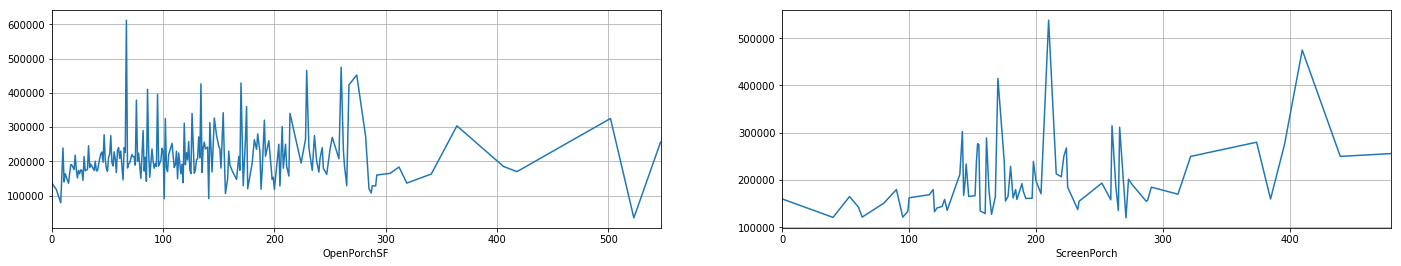

In [52]:
sns.set_context({"figure.figsize": (24, 4)})


plt.subplot2grid((1,2),(0,0))
others_df.groupby('OpenPorchSF').agg(np.median)['SalePrice'].plot(grid=True)

plt.subplot2grid((1,2),(0,1))
others_df.groupby('ScreenPorch').agg(np.median)['SalePrice'].plot(grid=True)




- 门廊 散点图

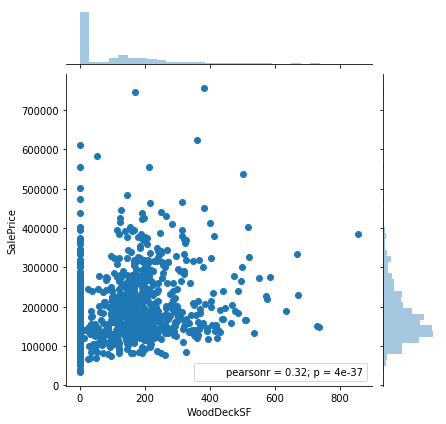

In [42]:
sns.jointplot(x='WoodDeckSF', y='SalePrice', data=others_df)

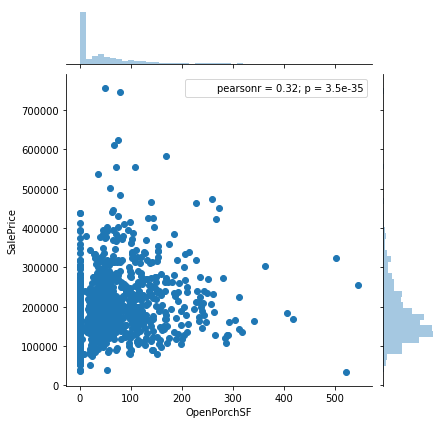

In [43]:
sns.jointplot(x='OpenPorchSF', y='SalePrice', data=others_df)

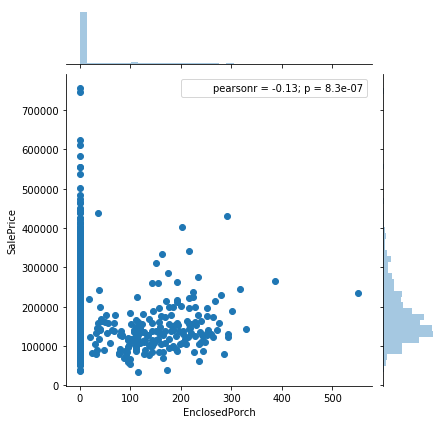

In [44]:
sns.jointplot(x='EnclosedPorch', y='SalePrice', data=others_df)

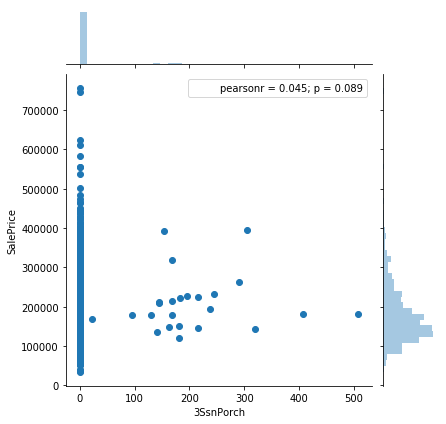

In [45]:
sns.jointplot(x='3SsnPorch', y='SalePrice', data=others_df)

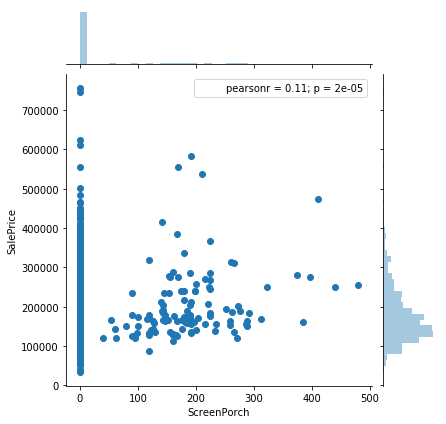

In [46]:
sns.jointplot(x='ScreenPorch', y='SalePrice', data=others_df)

# 6.户型特征处理
- onehot: KitchenQual Functional
- 其他先不处理，以后再分析一下分布再处理：'SalePrice','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                                    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'
  
# 7.配套特征处理：壁炉、车库、露台、走廊、游泳池、围栏

### 7-1.车库特征分析
- 类别型变量做one-hot：GarageType GarageFinish GarageQual GarageCond 
- GarageCars虽然数值型，是离散的，也做one-hot处理

### 7-2.车库特征分析2，连续数值型分桶
- GarageArea（车库面积） 0, 0,200 200,800 800,1200, >1200
- GarageYrBlt(车库年代) < 1940 1940,2000 >2000

### 7-3.配套特征分析： 壁炉、游泳池、围栏

- onehot：Fireplaces','FireplaceQu' PoolArea PavedDrive
- fence：围栏，有或者没有，分为两类
- 'PoolQC': 和其他差不多，ex贵一些 null太多，直接去掉


### 7-4.配套特征分析 ：露台门廊
- 根据数据规律，分桶处理，有时间再看下分布
    - WoodDeckSF   ==0, !=0
    - OpenPorchSF ==0, !=0
    - EnclosedPorch ==0, !=0
    - OpenPorchSF ==0, !=0
    - ScreenPorch ==0, !=0
